In [1]:
#Import Libaries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\stefa\Documents\07-Instacart Basket Analysis'

In [3]:
#Importing dataframe containing merged customers, orders, and products dataframes.
complete_df = pd.read_pickle(os.path.join(path, '02 data' , 'prepared data' , 'orders_products_customers_combined.pkl'))

Step 2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The PII in this dataframe are first_name, last_name, and state. I would bring this PII up with my superior to see if it needs to be changed or removed. For now, we keep it in.

In [4]:
complete_df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_time_of_day (24 hours)', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'busiest days', 'slowest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spending_user', 'spending_flag', 'ords_freq_median',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_dependents', 'fam_status', 'income'],
      dtype='object')

In [5]:
complete_df.insert(26, 'region', 'n/a')

In [6]:
complete_df.dtypes

product_id                         int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
order_id                           int64
user_id                           object
order_number                       int64
orders_day_of_week                 int64
orders_time_of_day (24 hours)      int64
days_since_prior_order           float64
add_to_cart_order                  int64
reordered                          int64
busiest days                      object
slowest days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
avg_spending_user                  int64
spending_flag                     object
ords_freq_median                 float64
frequency_flag                    object
first_name                        object
last_name                         object
gender          

In [7]:
complete_df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day (24 hours),...,first_name,last_name,gender,state,region,age,date_joined,number_dependents,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,n/a,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,n/a,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,n/a,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,n/a,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,n/a,40,2/9/2020,3,married,31308


In [8]:
state_region = {'Maine' : 'Northeast','New Hampshire' : 'Northeast','Vermont' : 'Northeast','Massachusetts' : 'Northeast','Rhode Island' : 'Northeast','Connecticut' : 'Northeast','New York' : 'Northeast','Pennsylvania' : 'Northeast','New Jersey' : 'Northeast','Wisconsin' : 'Midwest','Michigan' : 'Midwest','Illinois' : 'Midwest','Indiana' : 'Midwest','Ohio' : 'Midwest','North Dakota' : 'Midwest','South Dakota' : 'Midwest','Nebraska' : 'Midwest','Kansas' : 'Midwest','Minnesota' : 'Midwest','Iowa' : 'Midwest','Missouri' : 'Midwest','Delaware' : 'South','Maryland' : 'South','District of Columbia' : 'South','Virginia' : 'South','West Virginia' : 'South','North Carolina' : 'South','South Carolina' : 'South','Georgia' : 'South','Florida' : 'South','Kentucky' : 'South','Tennessee' : 'South','Mississippi' : 'South','Alabama' : 'South','Oklahoma' : 'South','Texas' : 'South','Arkansas' : 'South','Louisiana' : 'South','Idaho' : 'West','Montana' : 'West','Wyoming' : 'West','Nevada' : 'West','Utah' : 'West','Colorado' : 'West','Arizona' : 'West','New Mexico' : 'West','Alaska' : 'West','Washington' : 'West','Oregon' : 'West','California' : 'West','Hawaii' : 'West'}

In [9]:
complete_df['region']= complete_df['state'].map(state_region)

In [10]:
complete_df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_time_of_day (24 hours)', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'busiest days', 'slowest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spending_user', 'spending_flag', 'ords_freq_median',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'region', 'age', 'date_joined', 'number_dependents', 'fam_status',
       'income'],
      dtype='object')

Step 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [11]:
complete_df[['state', 'region']]

,state,region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Vermont,Northeast
3,Wisconsin,Midwest
4,Wisconsin,Midwest
...,...,...
32434207,Rhode Island,Northeast
32434208,West Virginia,South
32434209,Michigan,Midwest
32434210,Michigan,Midwest


pd.crosstab(complete_df['region'], complete_df['spending_flag'],dropna=False)

Step 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

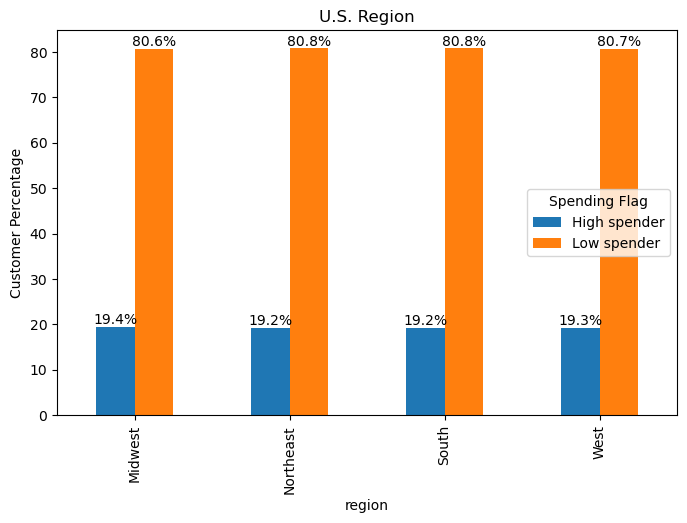

In [12]:
spending_region = pd.crosstab(complete_df['region'], complete_df['spending_flag'], normalize="index") * 100

bar = spending_region.plot(kind="bar", stacked=False, figsize=(8,5))
plt.ylabel("Customer Percentage")
plt.title("U.S. Region")
plt.legend(title="Spending Flag")

for container in bar.containers:
    bar.bar_label(container, fmt="%.1f%%", label_type="edge")

plt.show()

In [13]:
bar_chart=bar.get_figure()

In [14]:
bar_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_spending.png'))

In [15]:
complete_df.insert(18, 'exclusion_flag', 'n/a')

In [16]:
complete_df['exclusion_flag'] = complete_df['order_number'] < 5

In [17]:
customer_orders = complete_df.groupby('user_id')['order_number'].max().reset_index()

In [18]:
df_current = complete_df[complete_df["exclusion_flag"] == False].copy()

In [19]:
df_current.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'orders_time_of_day (24 hours)', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'busiest days', 'slowest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'exclusion_flag',
       'avg_spending_user', 'spending_flag', 'ords_freq_median',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'region', 'age', 'date_joined', 'number_dependents', 'fam_status',
       'income'],
      dtype='object')

In [20]:
df_current.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'complete_df_1.pkl'))